In [1]:
import numpy as np
import pandas as pd
print(pd.__version__)

2.0.2


# Pivot Table
Data pivot is one of the most commonly used data summarization tools. It is often performed in Excel, where it allows aggregating data based on one or multiple specified dimensions. Similarly, Pandas provides pivot functions to achieve similar functionality.

## `df.pivot`

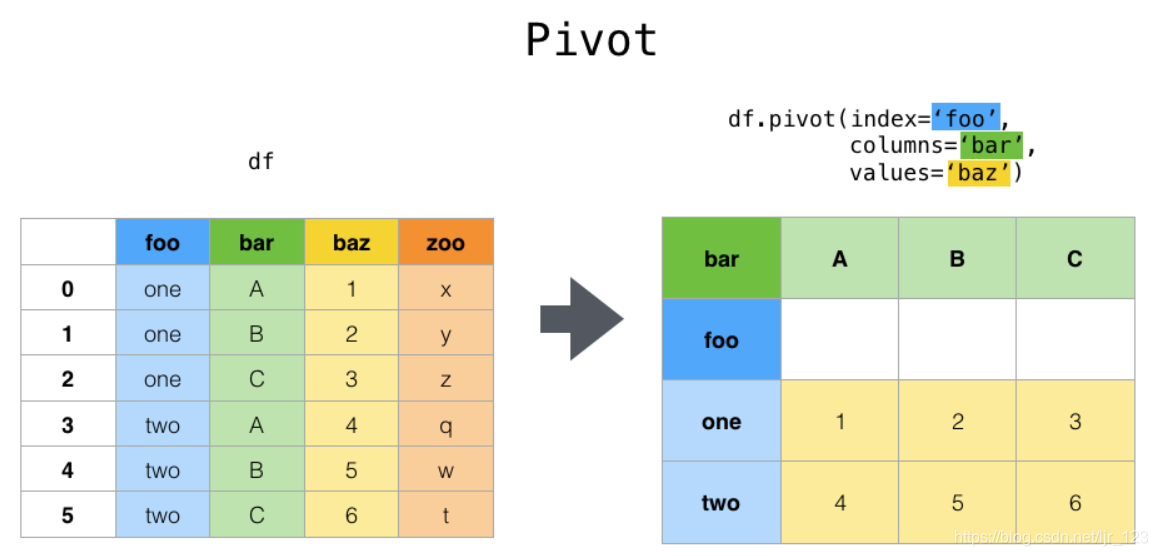

```python
DataFrame.pivot(index = None, Columns = None, values = None)
```
* `index`: The index column(s) of the new DataFrame. It is used for grouping the data. If set to None, the existing index will be used.

* `columns`: The column(s) of the new DataFrame. If there are duplicate values after pivoting, an error will be raised.

* `values`: The column used to fill the DataFrame. If not specified, all remaining columns will be used, and the resulting DataFrame will have columns with a hierarchical index structure.

In [2]:
df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two','two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [3]:
df.pivot(index = 'foo', columns = 'bar', values = 'baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [4]:
df.pivot(index = 'foo', columns = 'bar', values = ['baz', 'zoo'])

baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t

##### The pivot function has a strong limitation that it does not allow duplicate pairs of row and column indices in the value

## `df.pivot_table`
The pivot function, `df.pivot()`, can only reorganize the data. If there are duplicate values and you need to perform aggregate calculations, we should use `pd.pivot_table()`. It allows us to achieve advanced data pivot functionality similar to Excel.
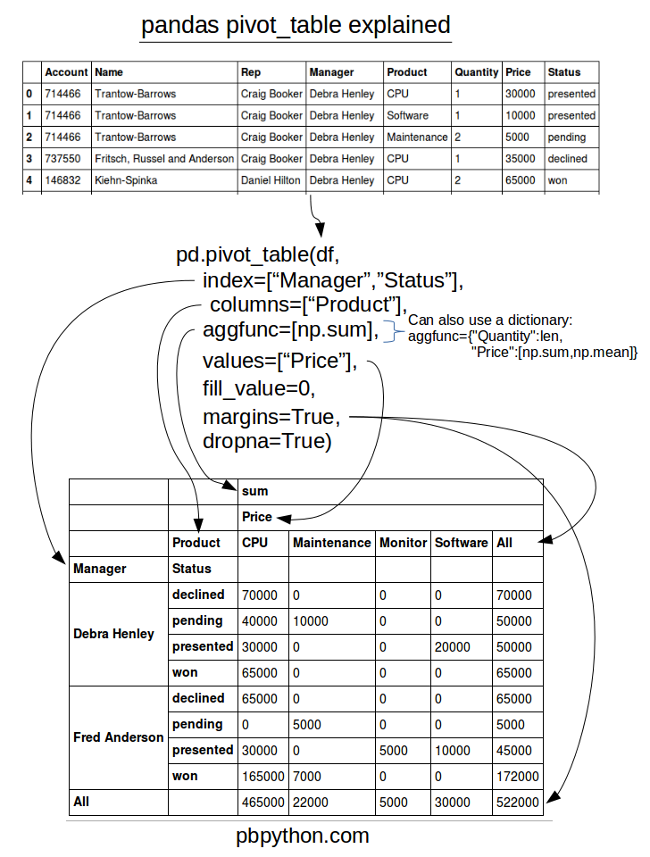

```python

pandas.pivot_table(data, values = None, index = None, columns = None, aggfunc = 'mean', 
                   fill_value = None, margins = False, dropna = True, margins_name = 'All', 
                   observed = False, sort = True)

```

* `data`: The DataFrame object to be pivoted.
* `values`: The column(s) to be aggregated.
* `index`: The keys to group by on the pivot table index.
* `columns`: The keys to group by on the pivot table columns.
* `aggfunc`: The function used for aggregation. The default is `numpy.mean`.

In [5]:
df = pd.DataFrame({
    'Account': [714466, 714466, 714466, 737550, 146832, 218895, 218895, 412290, 740150, 141962, 714466, 737550, 146832, 218895, 412290, 740150],
    'Customer Name': ['ABC Company', 'ABC Company', 'ABC Company', 'XYZ Corporation', 'DEF Inc', 'GHI Enterprises', 'GHI Enterprises', 'JKL Ltd', 'MNO Corp', 'PQR Industries', 'ABC Company', 'XYZ Corporation', 'DEF Inc', 'GHI Enterprises', 'JKL Ltd', 'MNO Corp'],
    'Salesperson': ['John Smith', 'John Smith', 'John Smith', 'Jane Doe', 'Jane Doe', 'Jane Doe', 'Sam Johnson', 'Sam Johnson', 'Sam Johnson', 'Sam Johnson', 'John Smith', 'Jane Doe', 'Jane Doe', 'Jane Doe', 'Sam Johnson', 'Sam Johnson'],
    'Sales Director': ['Emily Brown', 'John Davis', 'Sarah Thompson', 'Emily Brown', 'John Davis', 'Sarah Thompson', 'Emily Brown', 'John Davis', 'Sarah Thompson', 'Emily Brown', 'John Davis', 'Sarah Thompson', 'Emily Brown', 'John Davis', 'Sarah Thompson', 'Emily Brown'],
    'Product': ['Product A', 'Product B', 'Product A', 'Product C', 'Product B', 'Product C', 'Product D', 'Product A', 'Product B', 'Product C', 'Product A', 'Product C', 'Product B', 'Product C', 'Product D', 'Product A'],
    'Quantity': [5, 2, 3, 4, 1, 6, 2, 3, 2, 5, 2, 4, 1, 3, 2, 3],
    'Price': [100, 200, 150, 300, 250, 200, 150, 100, 250, 200, 200, 300, 250, 200, 150, 100],
    'Status': ['Pending', 'Approved', 'Approved', 'Pending', 'Approved', 'Approved', 'Pending', 'Approved', 'Pending', 'Approved', 'Approved', 'Pending', 'Approved', 'Approved', 'Pending', 'Approved']
})

df

,Account,Customer Name,Salesperson,Sales Director,Product,Quantity,Price,Status
0,714466,ABC Company,John Smith,Emily Brown,Product A,5,100,Pending
1,714466,ABC Company,John Smith,John Davis,Product B,2,200,Approved
2,714466,ABC Company,John Smith,Sarah Thompson,Product A,3,150,Approved
3,737550,XYZ Corporation,Jane Doe,Emily Brown,Product C,4,300,Pending
4,146832,DEF Inc,Jane Doe,John Davis,Product B,1,250,Approved
5,218895,GHI Enterprises,Jane Doe,Sarah Thompson,Product C,6,200,Approved
6,218895,GHI Enterprises,Sam Johnson,Emily Brown,Product D,2,150,Pending
7,412290,JKL Ltd,Sam Johnson,John Davis,Product A,3,100,Approved
8,740150,MNO Corp,Sam Johnson,Sarah Thompson,Product B,2,250,Pending
9,141962,PQR Industries,Sam Johnson,Emily Brown,Product C,5,200,Approved


### index property
#### Specify a single index

To specify the "Customer Name" column as the index column and display only numeric values with their mean values:

In [6]:
pd.pivot_table(df, index = 'Customer Name', values = ['Quantity', 'Price'])

,Price,Quantity
Customer Name,,
ABC Company,162.500000,3.000000
DEF Inc,250.000000,1.000000
GHI Enterprises,183.333333,3.666667
JKL Ltd,125.000000,2.500000
MNO Corp,175.000000,2.500000
PQR Industries,200.000000,5.000000
XYZ Corporation,300.000000,4.000000


### Specify multiple indices

The order of the index can affect the visual experience of the pivot table, even though the results are the same. 

In [7]:
pd.pivot_table(df, index = ['Customer Name', 'Salesperson', 'Sales Director'], values = ['Quantity', 'Price'])

Price  Quantity
Customer Name   Salesperson Sales Director                 
ABC Company     John Smith  Emily Brown       100         5
                            John Davis        200         2
                            Sarah Thompson    150         3
DEF Inc         Jane Doe    Emily Brown       250         1
                            John Davis        250         1
GHI Enterprises Jane Doe    John Davis        200         3
                            Sarah Thompson    200         6
                Sam Johnson Emily Brown       150         2
JKL Ltd         Sam Johnson John Davis        100         3
                            Sarah Thompson    150         2
MNO Corp        Sam Johnson Emily Brown       100         3
                            Sarah Thompson    250         2
PQR Industries  Sam Johnson Emily Brown       200         5
XYZ Corporation Jane Doe    Emily Brown       300         4
                            Sarah Thompson    300         4

### `aggfunc` property
When the `aggfunc` parameter is not specified in the `pivot_table` function, it defaults to `aggfunc='mean'`, which calculates the mean (average) value.

#### Single function

In [8]:
pd.pivot_table(df, index = ['Sales Director', 'Salesperson', 'Customer Name'], 
               values = ['Quantity', 'Price'],
              aggfunc = np.sum)

Price  Quantity
Sales Director Salesperson Customer Name                   
Emily Brown    Jane Doe    DEF Inc            250         1
                           XYZ Corporation    300         4
               John Smith  ABC Company        100         5
               Sam Johnson GHI Enterprises    150         2
                           MNO Corp           100         3
                           PQR Industries     200         5
John Davis     Jane Doe    DEF Inc            250         1
                           GHI Enterprises    200         3
               John Smith  ABC Company        400         4
               Sam Johnson JKL Ltd            100         3
Sarah Thompson Jane Doe    GHI Enterprises    200         6
                           XYZ Corporation    300         4
               John Smith  ABC Company        150         3
               Sam Johnson JKL Ltd            150         2
                           MNO Corp           250         2

#### Multiple Functions

In [9]:
pd.pivot_table(df, index = ['Sales Director', 'Salesperson', 'Customer Name'], 
               values = ['Quantity', 'Price'],
              aggfunc = [np.sum, len, np.mean])

sum            len           \
                                           Price Quantity Price Quantity   
Sales Director Salesperson Customer Name                                   
Emily Brown    Jane Doe    DEF Inc           250        1     1        1   
                           XYZ Corporation   300        4     1        1   
               John Smith  ABC Company       100        5     1        1   
               Sam Johnson GHI Enterprises   150        2     1        1   
                           MNO Corp          100        3     1        1   
                           PQR Industries    200        5     1        1   
John Davis     Jane Doe    DEF Inc           250        1     1        1   
                           GHI Enterprises   200        3     1        1   
               John Smith  ABC Company       400        4     2        2   
               Sam Johnson JKL Ltd           100        3     1        1   
Sarah Thompson Jane Doe    GHI Enterprises   200        6     1        1   
                           XYZ Corporation   300        4     1        1   
               John Smith  ABC Company       150        3     1        1   
               Sam Johnson JKL Ltd           150        2     1        1   
                           MNO Corp          250        2     1        1   

                                            mean           
                                           Price Quantity  
Sales Director Salesperson Customer Name                   
Emily Brown    Jane Doe    DEF Inc           250        1  
                           XYZ Corporation   300        4  
               John Smith  ABC Company       100        5  
               Sam Johnson GHI Enterprises   150        2  
                           MNO Corp          100        3  
                           PQR Industries    200        5  
John Davis     Jane Doe    DEF Inc           250        1  
                           GHI Enterprises   200        3  
               John Smith  ABC Company       200        2  
               Sam Johnson JKL Ltd           100        3  
Sarah Thompson Jane Doe    GHI Enterprises   200        6  
                           XYZ Corporation   300        4  
               John Smith  ABC Company       150        3  
               Sam Johnson JKL Ltd           150        2  
                           MNO Corp          250        2

### `columns` and `fill_value` property

The `columns` parameter is used to display the values of categorical data, and it can be used in conjunction with the `fill_value` parameter. Additionally, the use of square brackets with values, `aggfunc`, and columns can slightly affect the output.

* when using the columns parameter in the pivot_table function, if a particular column value is not present in the original DataFrame, it will be displayed as NaN in the resulting pivot table

In [10]:
pd.pivot_table(df, index = ['Sales Director', 'Salesperson'], 
               values = ['Price'],
              aggfunc = [np.sum],
              columns = 'Product')

sum                              
                               Price                              
Product                    Product A Product B Product C Product D
Sales Director Salesperson                                        
Emily Brown    Jane Doe          NaN     250.0     300.0       NaN
               John Smith      100.0       NaN       NaN       NaN
               Sam Johnson     100.0       NaN     200.0     150.0
John Davis     Jane Doe          NaN     250.0     200.0       NaN
               John Smith      200.0     200.0       NaN       NaN
               Sam Johnson     100.0       NaN       NaN       NaN
Sarah Thompson Jane Doe          NaN       NaN     500.0       NaN
               John Smith      150.0       NaN       NaN       NaN
               Sam Johnson       NaN     250.0       NaN     150.0

* we can use the `fill_value` parameter in the pivot_table function to fill missing values with a specific value, such as 0. By specifying `fill_value = 0`

In [11]:
pd.pivot_table(df, index = ['Sales Director', 'Salesperson'], 
               values = ['Price'],
              aggfunc = [np.sum],
              columns = 'Product', fill_value = 0)

sum                              
                               Price                              
Product                    Product A Product B Product C Product D
Sales Director Salesperson                                        
Emily Brown    Jane Doe            0       250       300         0
               John Smith        100         0         0         0
               Sam Johnson       100         0       200       150
John Davis     Jane Doe            0       250       200         0
               John Smith        200       200         0         0
               Sam Johnson       100         0         0         0
Sarah Thompson Jane Doe            0         0       500         0
               John Smith        150         0         0         0
               Sam Johnson         0       250         0       150

* To include the margins in the pivot table, you can set the margins parameter to `True` in the pivot_table function. This will add an additional row and column labeled "All" that represents the overall summary of the data. The calculation performed for the "All" row and column will be based on the specified `aggfunc`

In [12]:
pd.pivot_table(df, index = ['Sales Director', 'Salesperson', 'Customer Name', 'Product'], 
               values = ['Quantity', 'Price'],
              aggfunc = [np.sum],
              columns = 'Status', fill_value = 0, margins = True)

sum                \
                                                        Price                 
Status                                               Approved Pending   All   
Sales Director Salesperson Customer Name   Product                            
Emily Brown    Jane Doe    DEF Inc         Product B      250       0   250   
                           XYZ Corporation Product C        0     300   300   
               John Smith  ABC Company     Product A        0     100   100   
               Sam Johnson GHI Enterprises Product D        0     150   150   
                           MNO Corp        Product A      100       0   100   
                           PQR Industries  Product C      200       0   200   
John Davis     Jane Doe    DEF Inc         Product B      250       0   250   
                           GHI Enterprises Product C      200       0   200   
               John Smith  ABC Company     Product A      200       0   200   
                                           Product B      200       0   200   
               Sam Johnson JKL Ltd         Product A      100       0   100   
Sarah Thompson Jane Doe    GHI Enterprises Product C      200       0   200   
                           XYZ Corporation Product C        0     300   300   
               John Smith  ABC Company     Product A      150       0   150   
               Sam Johnson JKL Ltd         Product D        0     150   150   
                           MNO Corp        Product B        0     250   250   
All                                                      1850    1250  3100   

                                                                           
                                                     Quantity              
Status                                               Approved Pending All  
Sales Director Salesperson Customer Name   Product                         
Emily Brown    Jane Doe    DEF Inc         Product B        1       0   1  
                           XYZ Corporation Product C        0       4   4  
               John Smith  ABC Company     Product A        0       5   5  
               Sam Johnson GHI Enterprises Product D        0       2   2  
                           MNO Corp        Product A        3       0   3  
                           PQR Industries  Product C        5       0   5  
John Davis     Jane Doe    DEF Inc         Product B        1       0   1  
                           GHI Enterprises Product C        3       0   3  
               John Smith  ABC Company     Product A        2       0   2  
                                           Product B        2       0   2  
               Sam Johnson JKL Ltd         Product A        3       0   3  
Sarah Thompson Jane Doe    GHI Enterprises Product C        6       0   6  
                           XYZ Corporation Product C        0       4   4  
               John Smith  ABC Company     Product A        3       0   3  
               Sam Johnson JKL Ltd         Product D        0       2   2  
                           MNO Corp        Product B        0       2   2  
All                                                        29      19  48

### Filter on pivot table


Once we have generated a pivot table, we can apply filtering to it using standard DataFrame operations. 
* **Using boolean indexing**: we can use boolean indexing to filter the rows or columns of the pivot table based on specific conditions. For example, to filter the rows where the sum of quantities is greater than 10:
```python
filtered_table = pivot_table[pivot_table['Quantity'] > 10]
```

* **Using the query method**: The query method allows you to write SQL-like queries to filter the pivot table. For example, to filter the rows where the product is either 'Product A' or 'Product B':
```python
filtered_table = pivot_table.query("Product in ['Product A', 'Product B']")
```

* **Using the `loc` indexer**: The `loc` indexer allows you to select specific rows and columns based on labels. For example, to select only the rows where the salesperson is 'John Smith' and the columns where the product is 'Product A':
```python
filtered_table = pivot_table.loc['Product A', 'John Smith']
```

In [13]:
data = pd.pivot_table(df, index = ['Sales Director', 'Salesperson', 'Customer Name', 'Product'], 
               values = ['Quantity', 'Price'],
              aggfunc = [np.sum],
              columns = 'Status', fill_value = 0, margins = True)
data.query("`Sales Director` == 'Emily Brown'") # Pay attention to the quotation mark

sum               \
                                                        Price                
Status                                               Approved Pending  All   
Sales Director Salesperson Customer Name   Product                           
Emily Brown    Jane Doe    DEF Inc         Product B      250       0  250   
                           XYZ Corporation Product C        0     300  300   
               John Smith  ABC Company     Product A        0     100  100   
               Sam Johnson GHI Enterprises Product D        0     150  150   
                           MNO Corp        Product A      100       0  100   
                           PQR Industries  Product C      200       0  200   

                                                                           
                                                     Quantity              
Status                                               Approved Pending All  
Sales Director Salesperson Customer Name   Product                         
Emily Brown    Jane Doe    DEF Inc         Product B        1       0   1  
                           XYZ Corporation Product C        0       4   4  
               John Smith  ABC Company     Product A        0       5   5  
               Sam Johnson GHI Enterprises Product D        0       2   2  
                           MNO Corp        Product A        3       0   3  
                           PQR Industries  Product C        5       0   5

In [14]:
data1 = pd.pivot_table(df, index = ['Sales Director', 'Salesperson', 'Customer Name'], 
               values = ['Quantity', 'Price'],
              aggfunc = [np.sum, len, np.mean])
data1

sum            len           \
                                           Price Quantity Price Quantity   
Sales Director Salesperson Customer Name                                   
Emily Brown    Jane Doe    DEF Inc           250        1     1        1   
                           XYZ Corporation   300        4     1        1   
               John Smith  ABC Company       100        5     1        1   
               Sam Johnson GHI Enterprises   150        2     1        1   
                           MNO Corp          100        3     1        1   
                           PQR Industries    200        5     1        1   
John Davis     Jane Doe    DEF Inc           250        1     1        1   
                           GHI Enterprises   200        3     1        1   
               John Smith  ABC Company       400        4     2        2   
               Sam Johnson JKL Ltd           100        3     1        1   
Sarah Thompson Jane Doe    GHI Enterprises   200        6     1        1   
                           XYZ Corporation   300        4     1        1   
               John Smith  ABC Company       150        3     1        1   
               Sam Johnson JKL Ltd           150        2     1        1   
                           MNO Corp          250        2     1        1   

                                            mean           
                                           Price Quantity  
Sales Director Salesperson Customer Name                   
Emily Brown    Jane Doe    DEF Inc           250        1  
                           XYZ Corporation   300        4  
               John Smith  ABC Company       100        5  
               Sam Johnson GHI Enterprises   150        2  
                           MNO Corp          100        3  
                           PQR Industries    200        5  
John Davis     Jane Doe    DEF Inc           250        1  
                           GHI Enterprises   200        3  
               John Smith  ABC Company       200        2  
               Sam Johnson JKL Ltd           100        3  
Sarah Thompson Jane Doe    GHI Enterprises   200        6  
                           XYZ Corporation   300        4  
               John Smith  ABC Company       150        3  
               Sam Johnson JKL Ltd           150        2  
                           MNO Corp          250        2

##### `xs()` method: 
we can use the `xs` method to drill down into a specific cross-section of a pivot table. `xs` allows us to retrieve a specific slice of data by specifying the labels of rows or columns.

In [15]:
data1.xs('Emily Brown', level = 0)

sum            len           mean         
                            Price Quantity Price Quantity Price Quantity
Salesperson Customer Name                                               
Jane Doe    DEF Inc           250        1     1        1   250        1
            XYZ Corporation   300        4     1        1   300        4
John Smith  ABC Company       100        5     1        1   100        5
Sam Johnson GHI Enterprises   150        2     1        1   150        2
            MNO Corp          100        3     1        1   100        3
            PQR Industries    200        5     1        1   200        5

In [16]:
data1.xs(('Emily Brown','Jane Doe'), level = 0)

sum            len           mean         
                Price Quantity Price Quantity Price Quantity
Customer Name                                               
DEF Inc           250        1     1        1   250        1
XYZ Corporation   300        4     1        1   300        4

In [17]:
# Look up all the sales director
data1.index.get_level_values(0).unique()

Index(['Emily Brown', 'John Davis', 'Sarah Thompson'], dtype='object', name='Sales Director')

In [18]:
# Look up all the sales person
data1.index.get_level_values(1).unique()

Index(['Jane Doe', 'John Smith', 'Sam Johnson'], dtype='object', name='Salesperson')

##### Write the sales data by sales director to excel file

In [19]:
writer = pd.ExcelWriter('sales.xlsx')

for name in data1.index.get_level_values(0).unique():    # Iterate over the sales director
    temp_df = data1.xs(name, level=0)                    # Get the data for each sales director 
    temp_df.to_excel(excel_writer = writer, sheet_name = name)  # Sheet name by sales director
writer.close()   #The save() method has been deprecated and removed in Pandas. use close() instead.

# Data Stack

If both the row and column indices in the original dataset are hierarchical indices, the stacking process involves rotating the columns of the dataset into rows. Similarly, the unstacking process involves rotating the rows of the data into columns.
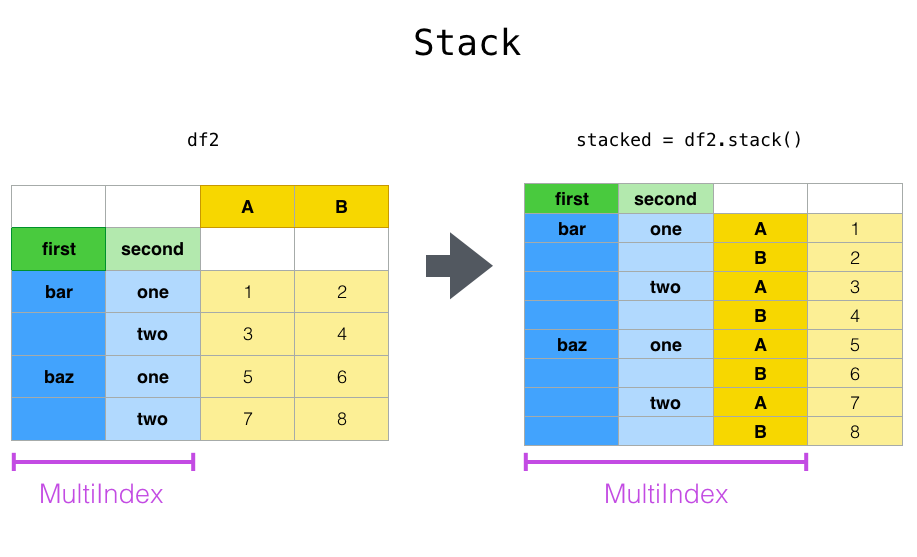






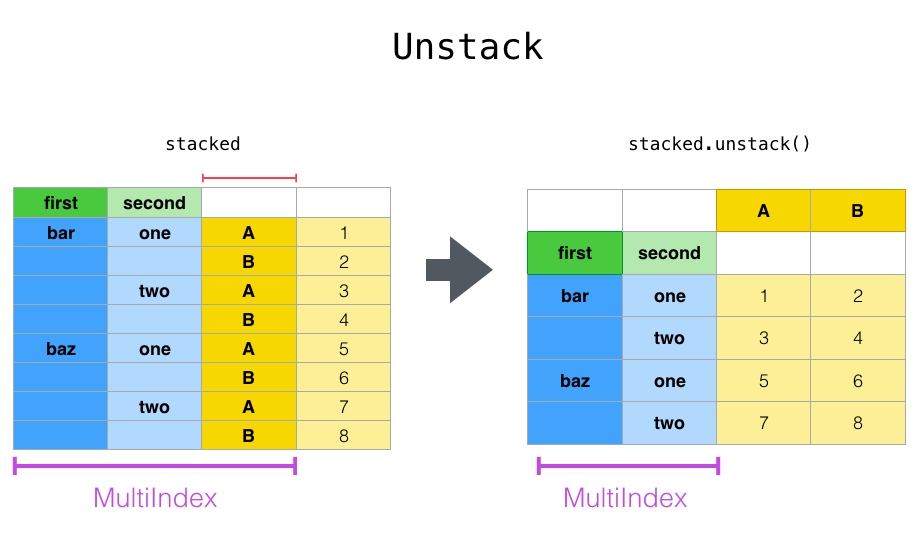

These methods essentially perform the following:

* `stack`: "Pivots" the columns at a specific (possibly multi-level) level into rows, returning a DataFrame with an index that has a new innermost row label.

* `unstack`: (The inverse operation of stacking) "Pivots" a level of the (possibly multi-level) row index into the column axis, resulting in a reshaped DataFrame with a new innermost column label level.

The stack process converts columns into rows in the dataset, while the unstack process converts rows into columns.

In [20]:
df_single_level_cols = pd.DataFrame([[1, 2], [3, 4]],
                                    index = ['Cat', 'Dog'],
                                    columns = ['Weight', 'Height'])
df_single_level_cols

,Weight,Height
Cat,1,2
Dog,3,4


## Single level index

In [21]:
df_single_level_cols.stack()

Cat  Weight    1
     Height    2
Dog  Weight    3
     Height    4
dtype: int64

## Multiple level index

In [22]:
multicol1 = pd.MultiIndex.from_tuples([('weight', 'kg'),
                                       ('weight', 'pounds')])
df_multi_level_cols1 = pd.DataFrame([[1, 2], [2, 4]],
                                    index = ['cat', 'dog'],
                                    columns = multicol1)

df_multi_level_cols1

weight       
        kg pounds
cat      1      2
dog      2      4

In [23]:
# convert a second-level index of columns into rows, 
df_multi_level_cols1.stack() 

weight
cat kg           1
    pounds       2
dog kg           2
    pounds       4

## Level default values

The default value for the level parameter in the `stack()` and `unstack()` methods is -1. This means that if the DataFrame has a multi-level index, the innermost/last level of the index will be stacked or unstacked. If the DataFrame has a single-level index, the only available level is -1, so it will be stacked or unstacked

In [24]:
multicol2 = pd.MultiIndex.from_tuples([('weight', 'kg'), ('height', 'cm')])
df_multi_level_cols2 = pd.DataFrame([[1.0, 2.0], [3.0, 4.0]],
                                    index = ['cat', 'dog'],
                                    columns = multicol2)

df_multi_level_cols2

,weight,height
,kg,cm
cat,1.0,2.0
dog,3.0,4.0


In [25]:
df_multi_level_cols2.stack() # weight height and last level of the index kg and cm as rows

height  weight
cat cm     2.0     NaN
    kg     NaN     1.0
dog cm     4.0     NaN
    kg     NaN     3.0

## Specify the level

In [26]:
df_multi_level_cols2.stack(0) 

cm   kg
cat height  2.0  NaN
    weight  NaN  1.0
dog height  4.0  NaN
    weight  NaN  3.0

In [27]:
df_multi_level_cols2.stack(1)

height  weight
cat cm     2.0     NaN
    kg     NaN     1.0
dog cm     4.0     NaN
    kg     NaN     3.0

In [28]:
df_multi_level_cols2.stack([0, 1])

cat  height  cm    2.0
     weight  kg    1.0
dog  height  cm    4.0
     weight  kg    3.0
dtype: float64

## Delete the missing values

In [29]:
df_multi_level_cols3 = pd.DataFrame([[None, 1.0], [2.0, 3.0]],
                                    index=['cat', 'dog'],
                                    columns = multicol2)

df_multi_level_cols3

,weight,height
,kg,cm
cat,NaN,1.0
dog,2.0,3.0


In [30]:
df_multi_level_cols3.stack(dropna = False)

height  weight
cat cm     1.0     NaN
    kg     NaN     NaN
dog cm     3.0     NaN
    kg     NaN     2.0

In [31]:
df_multi_level_cols3.stack(dropna = True)

height  weight
cat cm     1.0     NaN
dog cm     3.0     NaN
    kg     NaN     2.0

## Unstack

In [32]:
index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),
                                   ('two', 'a'), ('two', 'b')])
s = pd.Series(np.arange(1, 5), index = index)
s

one  a    1
     b    2
two  a    3
     b    4
dtype: int32

In [33]:
s.index.levels

FrozenList([['one', 'two'], ['a', 'b']])

In [34]:
s.index.levels[0]  # first level index for a series

Index(['one', 'two'], dtype='object')

In [35]:
s.index.levels[1] # second level index for a series

Index(['a', 'b'], dtype='object')

In [36]:
s.index.levels[-1] # the last level is the second level

Index(['a', 'b'], dtype='object')

In [37]:
s.unstack() # default is the last level

,a,b
one,1,2
two,3,4


In [38]:
# To display the last level of the index as columns
s.unstack(level = -1)

,a,b
one,1,2
two,3,4


In [39]:
# To display the first level of index as column
s.unstack(level = 0)

,one,two
a,1,3
b,2,4


In [40]:
df = s.unstack(level = 0) # To unstack the DataFrame based on the first level of the index
df.unstack() # To unstack it again and restore it to its original form

one  a    1
     b    2
two  a    3
     b    4
dtype: int32

# Crosstab

Cross-tabulation, also known as `crosstab`, is a special type of pivot table used for frequency counting of grouped data. In simple terms, it creates a new DataFrame by combining unique elements from two or more columns, where the values in the intersection of rows and columns represent the count of their combination in the original data.

```python
pandas.crosstab(index, columns, values = None, rownames = None, colnames = None, aggfunc = None, margins = False, margins_name = 'All', dropna = True, normalize = False)
```
* `index`: Array-like or Series, values in the rows to group by.
* `columns`: Array-like or Series, values in the columns to group by.
* `values`: Array-like, optional, values to aggregate based on the factors. If not passed, computes a frequency table.
* `aggfunc`: Function, optional, aggregation function to apply if values are specified.
* `rownames`: Sequence, default None, must match the number of passed row arrays.
* `colnames`: Sequence, default None, must match the number of passed column arrays.
* `margins`: Boolean, default False, adds row/column margins (subtotals).
* `normalize`: Boolean or {'all', 'index', 'columns'}, default False. Normalizes the values by dividing all values by the sum.


In [41]:
index = pd.Index(data = ["A", "B", "C", "D", "E", "F", "G",'H'], name = "name")
data = {
    "age": [18, 30, 35, 18, 25, 30, 37, 25],
    "city": ["New York", "Los Angeles", "Huston", "Orlando", "Las Vegas", "Salt Lake City", "Miami", "Chicago"],
    "gender": ["male", "male", "female", "male", "female", "female", "male", "male"],
    "income": [3000, 8000, 8000, 4000, 6000, 7000, 10000, 70000]
}
user_info = pd.DataFrame(data = data, index = index)
user_info

,age,city,gender,income
name,,,,
A,18,New York,male,3000
B,30,Los Angeles,male,8000
C,35,Huston,female,8000
D,18,Orlando,male,4000
E,25,Las Vegas,female,6000
F,30,Salt Lake City,female,7000
G,37,Miami,male,10000
H,25,Chicago,male,70000


##### To create a cross-tabulation or contingency table to count the frequencies based on gender and age groups

In [42]:
pd.crosstab(index = user_info.gender, columns = user_info.age)

age,18,25,30,35,37
gender,,,,,
female,0,1,1,1,0
male,2,1,1,0,1


##### the `values` and `aggfunc` parameters in `pd.crosstab()` work together to perform aggregation operations on specific data within each group.

In [43]:
pd.crosstab(index = user_info.gender, columns = user_info.age, 
            values = user_info.income, aggfunc = 'mean')

age,18,25,30,35,37
gender,,,,,
female,NaN,6000.0,7000.0,8000.0,NaN
male,3500.0,70000.0,8000.0,NaN,10000.0


In [44]:
pd.crosstab(index = user_info.gender, columns = user_info.age, values = 1, aggfunc = 'count')

age,18,25,30,35,37
gender,,,,,
female,NaN,1.0,1.0,1.0,NaN
male,2.0,1.0,1.0,NaN,1.0


##### `normalize` 
The normalize parameter in `pd.crosstab()` allows you to normalize the resulting cross-tabulation by dividing the values by their sum. It controls the type of normalization to be applied and can take the following values:

* `all`: Divides all the values in the cross-tabulation by the sum of all values. This results in the entire cross-tabulation being normalized.
* `index`: Divides the values within each row (group) by the sum of the values in that row. This normalizes the values within each group independently.
* `columns`: Divides the values within each column (group) by the sum of the values in that column. This normalizes the values within each group independently.

In [45]:
pd.crosstab(index = user_info.gender, columns = user_info.age, 
            normalize = 'all')

age,18,25,30,35,37
gender,,,,,
female,0.00,0.125,0.125,0.125,0.000
male,0.25,0.125,0.125,0.000,0.125


In [46]:
pd.crosstab(index = user_info.gender, columns = user_info.age, 
            normalize = 'columns')  # across the columns 

age,18,25,30,35,37
gender,,,,,
female,0.0,0.5,0.5,1.0,0.0
male,1.0,0.5,0.5,0.0,1.0


In [47]:
pd.crosstab(index = user_info.gender, columns = user_info.age, 
            normalize = 'index')  # across the rows

age,18,25,30,35,37
gender,,,,,
female,0.0,0.333333,0.333333,0.333333,0.0
male,0.4,0.200000,0.200000,0.000000,0.2


# Melt
The `df.melt()` function in pandas is the inverse operation of `df.pivot()`. It is used to reshape or unpivot a DataFrame by converting columns into rows. The term `melt` refers to the process of dissolving or breaking down the data.
```python
pandas.melt(frame, id_vars = None, value_vars = None, var_name = None, value_name = 'value', 
            col_level = None, ignore_index = True
```
* `id_vars`: It is an optional parameter that specifies the columns to be used as identifier variables. These columns will remain unchanged and will serve as the unique identifier for each row in the resulting melted DataFrame.

* `value_vars`: It is an optional parameter that specifies the columns to be melted. If not specified, all columns that are not listed in id_vars will be melted.

* `var_name`: It is a scalar value that specifies the name of the new column that will store the melted column names. If set to None, the column name will be set to the DataFrame's columns.name attribute or default to "variable".

* `value_name`: It is a scalar value that specifies the name of the new column that will store the values from the melted columns. By default, it is set to "value".

* `col_level`: It is an optional parameter used when the columns have a MultiIndex. If specified, it indicates the level of the column index to be melted.

In [48]:
user_info_reset_index = user_info.reset_index()
user_info_reset_index

,name,age,city,gender,income
0,A,18,New York,male,3000
1,B,30,Los Angeles,male,8000
2,C,35,Huston,female,8000
3,D,18,Orlando,male,4000
4,E,25,Las Vegas,female,6000
5,F,30,Salt Lake City,female,7000
6,G,37,Miami,male,10000
7,H,25,Chicago,male,70000


In [49]:
melt_df = user_info_reset_index.melt(id_vars = ['name'], value_vars = ['gender'])
melt_df

,name,variable,value
0,A,gender,male
1,B,gender,male
2,C,gender,female
3,D,gender,male
4,E,gender,female
5,F,gender,female
6,G,gender,male
7,H,gender,male


In [50]:
user_info_reset_index.melt(id_vars = ['name', 'city'], value_vars = ['gender', 'age'])

,name,city,variable,value
0,A,New York,gender,male
1,B,Los Angeles,gender,male
2,C,Huston,gender,female
3,D,Orlando,gender,male
4,E,Las Vegas,gender,female
5,F,Salt Lake City,gender,female
6,G,Miami,gender,male
7,H,Chicago,gender,male
8,A,New York,age,18
9,B,Los Angeles,age,30


# Dummy variables

Dummy variables, also known as indicator variables, binary variables, or one-hot variables, are artificially created variables used to represent qualitative attributes. They are a way of quantifying categorical variables by assigning a value of 0 or 1 to each category.

One common application of dummy variables is in one-hot encoding, where categorical variables are converted into a binary vector representation. Each category of the variable is transformed into a separate dummy variable, with a value of 0 or 1 indicating whether the observation belongs to that category or not. This enables the inclusion of categorical variables in mathematical models that require numerical inputs.

```python
pandas.get_dummies(data, prefix = None, prefix_sep = '_', dummy_na = False, 
                   columns = None, sparse = False, drop_first = False, dtype = None)
```


In [51]:
pd.get_dummies(user_info.gender)

,female,male
name,,
A,False,True
B,False,True
C,True,False
D,False,True
E,True,False
F,True,False
G,False,True
H,False,True


In [52]:
pd.get_dummies(user_info.gender, prefix = 'Gender')

,Gender_female,Gender_male
name,,
A,False,True
B,False,True
C,True,False
D,False,True
E,True,False
F,True,False
G,False,True
H,False,True


In [53]:
pd.get_dummies(user_info, columns = ['gender'])

,age,city,income,gender_female,gender_male
name,,,,,
A,18,New York,3000,False,True
B,30,Los Angeles,8000,False,True
C,35,Huston,8000,True,False
D,18,Orlando,4000,False,True
E,25,Las Vegas,6000,True,False
F,30,Salt Lake City,7000,True,False
G,37,Miami,10000,False,True
H,25,Chicago,70000,False,True


# Transpose `df.T`

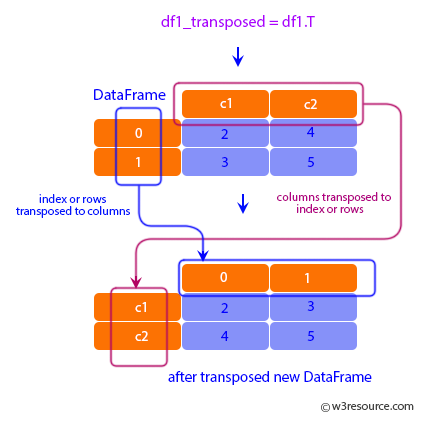

In [54]:
user_info_tranposed = user_info.T
user_info_tranposed 

name,A,B,C,D,E,F,G,H
age,18,30,35,18,25,30,37,25
city,New York,Los Angeles,Huston,Orlando,Las Vegas,Salt Lake City,Miami,Chicago
gender,male,male,female,male,female,female,male,male
income,3000,8000,8000,4000,6000,7000,10000,70000


# Factorizing values

It refers to the process of converting a one-dimensional dataset with repetitive values into enumerated values. This allows us to easily distinguish and analyze the data.

The `factorize()` function in pandas can be used at the top level as `pandas.factorize()`, as well as within the Series and Index objects as `Series.factorize()` and `Index.factorize()` methods, respectively.

The `factorize()` function or method assigns a unique integer code to each distinct value in the input data. The resulting codes represent the enumerated values, and they can be used as a more efficient and compact representation of the original data.


## Basic method

In [55]:
data = ['apple', 'orange', 'banana', 'apple', 'grape', 'orange', 'banana']

# Using the top-level factorize() function
codes, labels = pd.factorize(data)

print("Original data:", data)
print("Encoded codes:", codes)
print("Unique labels:", labels)

Original data: ['apple', 'orange', 'banana', 'apple', 'grape', 'orange', 'banana']
Encoded codes: [0 1 2 0 3 1 2]
Unique labels: ['apple' 'orange' 'banana' 'grape']


## Sort

In [56]:
labels, uniques = pd.factorize(['b', 'b', 'a', 'c', 'b'])
print('sort=False:',labels,uniques)
labels, uniques = pd.factorize(['b', 'b', 'a', 'c', 'b'], sort = True)
print('sort=True:',labels,uniques)    # To factorize values in lexicographical order

sort=False: [0 0 1 2 0] ['b' 'a' 'c']
sort=True: [1 1 0 2 1] ['a' 'b' 'c']


## Missing values
Missing values will not appear in the unique values list and will be assigned a code of -1 during encoding

In [57]:
col_code, col = pd.factorize(['Female', 'Male', 'Female', 'Male', np.nan, 'Male'], sort = True)
print(col_code, col)

[ 0  1  0  1 -1  1] ['Female' 'Male']


# `explode()`
Exploding a sequence refers to the process of expanding a column containing a sequence or list-like data into multiple rows, with each row representing a single element of the sequence. This can be useful when you have a column with nested values that you want to flatten for further analysis or processing.

In [58]:
data = {'ID': [1, 2, 3],
        'Items': [['Apple', 'Banana'], ['Orange'], ['Grape', 'Mango', 'Pineapple']]}

df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

df_exploded = df.explode('Items')

print("\nExploded DataFrame:")
print(df_exploded)

Original DataFrame:
   ID                      Items
0   1            [Apple, Banana]
1   2                   [Orange]
2   3  [Grape, Mango, Pineapple]

Exploded DataFrame:
   ID      Items
0   1      Apple
0   1     Banana
1   2     Orange
2   3      Grape
2   3      Mango
2   3  Pineapple


# Convert to a Numpy ndarray

## `df.to_numpy()`

In [59]:
user_info.to_numpy()

array([[18, 'New York', 'male', 3000],
       [30, 'Los Angeles', 'male', 8000],
       [35, 'Huston', 'female', 8000],
       [18, 'Orlando', 'male', 4000],
       [25, 'Las Vegas', 'female', 6000],
       [30, 'Salt Lake City', 'female', 7000],
       [37, 'Miami', 'male', 10000],
       [25, 'Chicago', 'male', 70000]], dtype=object)

In [60]:
user_info.age.to_numpy() # on series

array([18, 30, 35, 18, 25, 30, 37, 25], dtype=int64)

In [61]:
user_info[['gender','age']].to_numpy()

array([['male', 18],
       ['male', 30],
       ['female', 35],
       ['male', 18],
       ['female', 25],
       ['female', 30],
       ['male', 37],
       ['male', 25]], dtype=object)

## `df.to_records()`

The `to_records()` method in pandas is used to convert a DataFrame to a NumPy ndarray with each row represented as a structured array record. Each record contains the column values and their corresponding column names as fields.

In [62]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

df

,A,B
0,1,4
1,2,5
2,3,6


In [63]:
# Convert DataFrame to structured ndarray
records = df.to_records()
records

rec.array([(0, 1, 4), (1, 2, 5), (2, 3, 6)],
          dtype=[('index', '<i8'), ('A', '<i8'), ('B', '<i8')])

In [64]:
for record in records:
    print(record)

(0, 1, 4)
(1, 2, 5)
(2, 3, 6)


## Numpy method
We can use `np.array()` to directly convert a DataFrame to a NumPy ndarray.

In [65]:
np.array(user_info)

array([[18, 'New York', 'male', 3000],
       [30, 'Los Angeles', 'male', 8000],
       [35, 'Huston', 'female', 8000],
       [18, 'Orlando', 'male', 4000],
       [25, 'Las Vegas', 'female', 6000],
       [30, 'Salt Lake City', 'female', 7000],
       [37, 'Miami', 'male', 10000],
       [25, 'Chicago', 'male', 70000]], dtype=object)

In [66]:
np.array(user_info['age'])

array([18, 30, 35, 18, 25, 30, 37, 25], dtype=int64)